In [2]:
from IPython.display import display, HTML
display(HTML('<h1><img src="logo.jpg"></h1>'))


In [3]:
display(HTML('<h1>__________________________________________________________________________________</h1>'))

In [4]:
display(HTML('<h2>____________________________________________________________________________________________________</h2>'))

In [5]:
display(HTML('<h3>_____________________________________________________________________________________________________________________</h3>'))

In [6]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# The Dataset

In [7]:
train2 = pd.read_csv("Bihis 2020.csv")


In [8]:
train1 = pd.read_csv("Bihis 2021.csv")


In [9]:
test = pd.read_csv("Bihis 2022.csv")


In [10]:
train2_len = len(train2)
train1_len = len(train1)
test_len = len(test)

In [11]:
df = pd.concat([train2, train1, test], axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Name,Size,Cost,Category,Sales,Year
0,Kamias,Medium,100,Tree,3400.0,2020
1,Kalamasi,Medium,120,Tree,4080.0,2020
2,Papaya,Small,50,Tree,1700.0,2020
3,Tundan,Small,80,Tree,3200.0,2020
4,Lakatan,Small,150,Tree,10500.0,2020


In [12]:
df.tail()

,Name,Size,Cost,Category,Sales,Year
83,Bridal Boket,Small,100,Flower,NaN,2022
84,Sampaguita,Small,50,Flower,NaN,2022
85,Soil,NaN,50,Tool,NaN,2022
86,Manga Kalabaw,Small,200,Tree,NaN,2022
87,Manga Pico,Medium,150,Tree,NaN,2022


# Total Dataset

In [13]:
print(len(train2), len(train1), len(test), len(df))

28 30 30 88


In [14]:
_ = df.apply(lambda x: len(x.unique()))

# Processing Datasets

In [15]:
_ = df.isnull().sum()

In [16]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
_ = cat_col

In [17]:
cat_col.remove('Name')
_ = cat_col


In [18]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print();

Size
Medium    38
Small     32
Large     15
Name: Size, dtype: int64

Category
Tree      58
Tool      15
Flower    15
Name: Category, dtype: int64



In [19]:
size_mode = df.pivot_table(values = 'Size', columns = 'Category', aggfunc=(lambda x: x.mode()[0]))
_ = size_mode

In [20]:
miss_bool = df['Size'].isnull()
_ = df.loc[miss_bool, 'Size'] = df.loc[miss_bool, 'Category'].apply(lambda x: size_mode[x])

In [21]:
_ = df['Size'].isnull().sum()

In [22]:
df['Total_Year'] = 2022 - df['Year']

In [23]:
_ = df['Total_Year']

# Exploration Data Analysis

Text(0, 0.5, 'Peak')

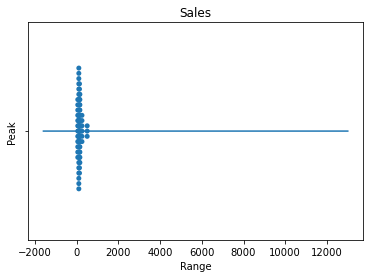

In [50]:
fig0 = sns.swarmplot(df['Cost'])
plt.xlabel("Range")
plt.title("Cost")
plt.ylabel("Peak")
fig1 = sns.distplot(df['Sales'])
plt.xlabel("Range")
plt.title("Sales")
plt.ylabel("Peak")

<AxesSubplot:xlabel='Sales', ylabel='Count'>

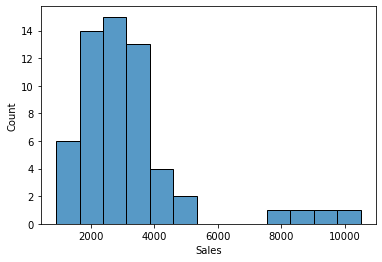

In [48]:
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
sns.histplot(df['Sales'])

<AxesSubplot:xlabel='Year'>

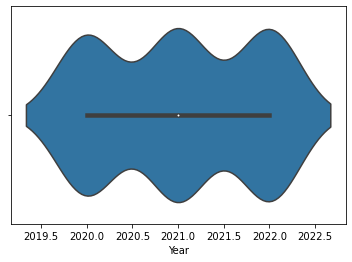

In [45]:
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: right;
    text-align: right;
}
</style>
"""))
sns.violinplot(df['Year'])

# Coorelation Matrix

<AxesSubplot:>

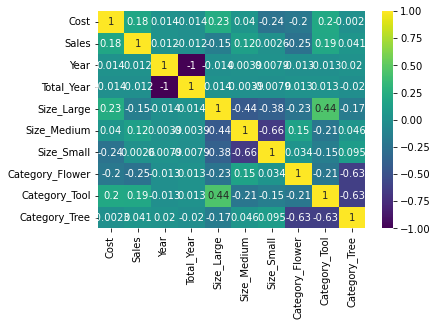

In [51]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

In [28]:
df = pd.get_dummies(df, columns=[ 'Size', 'Category'])
df.head();

In [29]:
df.tail();

In [30]:
train2 = df.iloc[:train2_len,:]
train1 = df.iloc[train2_len:,:]
test = df.iloc[train2_len:,:]

In [31]:
test = test.drop(columns=['Sales'])
test.head();

In [32]:
test.tail();

In [33]:
X = train2.drop(columns=['Year', 'Name', 'Sales'])
y = train2['Sales']

# Model Training Random Forest Regressor

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train2(model, X, y):
    model.fit(X, y)
    
    pred = model.predict(X)
    
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MeanSquareError:", mean_squared_error(y,pred))
    print("CrossValidationScore:", cv_score)

Model Report
MeanSquareError: 706309.9005164391
CrossValidationScore: 5277187.774596102


<AxesSubplot:title={'center':'Feature Importances'}>

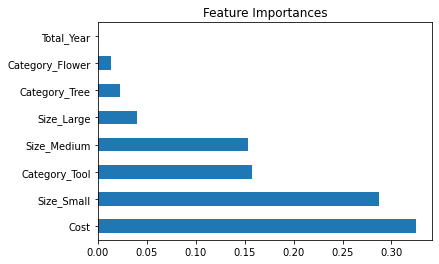

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train2(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='barh', title="Feature Importances")

# Prediction on test data

In [36]:
x_test = test.drop(columns=['Year', 'Name'])
x_test.head();

In [37]:
model = RandomForestRegressor()
_ = model.fit(X, y)

In [38]:
pred = model.predict(x_test)
pred

array([2852.59047619, 3799.16333333, 1948.66      , 2692.12666667,
       7327.64285714, 3681.85714286, 2413.16416667, 3617.30333333,
       2852.59047619, 1447.26666667, 2413.16416667, 2852.59047619,
       2792.52583333, 2413.16416667, 3393.1       , 1447.26666667,
       2413.16416667, 3681.85714286, 3277.06666667, 6030.72380952,
       4259.2       , 4631.2       , 2187.6       , 1925.93333333,
       2983.1       , 2354.8452381 , 1747.7       , 2651.73333333,
       7319.56285714, 3393.1       , 2852.59047619, 3799.16333333,
       1948.66      , 2692.12666667, 7327.64285714, 3681.85714286,
       2413.16416667, 3617.30333333, 2852.59047619, 1447.26666667,
       2413.16416667, 2852.59047619, 2792.52583333, 2413.16416667,
       3393.1       , 1447.26666667, 2413.16416667, 3681.85714286,
       3277.06666667, 6030.72380952, 4259.2       , 4631.2       ,
       2187.6       , 1925.93333333, 2983.1       , 2354.8452381 ,
       1747.7       , 2651.73333333, 7319.56285714, 3393.1    

In [39]:
mission = pd.DataFrame()
mission['Name'] = test["Name"]
mission['sales'] = pred
mission.head()


,Name,sales
28,Kamias,2852.590476
29,Kalamasi,3799.163333
30,Papaya,1948.660000
31,Tundan,2692.126667
32,Lakatan,7327.642857


In [40]:
mission.tail()

,Name,sales
83,Bridal Boket,2354.845238
84,Sampaguita,1747.700000
85,Soil,2651.733333
86,Manga Kalabaw,7319.562857
87,Manga Pico,3393.100000


In [41]:
!pip install voila